In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import os
import glob
import pingouin as pg
from mdi_computation import mdi_compute, smdi_compute
%matplotlib widget

<h1 align="center">Organizing and Loading Data</h1>

In [4]:
compiled_csv_paths = glob.glob("./protein_extract_spectra/*scans.csv")
wavenumber = pd.read_csv("./wavenumber.csv")
pe24, pe32 = [pd.read_csv(path) for path in compiled_csv_paths]

scan_number_dataframes = [pe24, pe32]

for df in scan_number_dataframes:
    df["average"] = df.mean(axis=1)

<h1 align="center">Visualizing Spectra</h1>

In [5]:
colors = ["blue", "green"]
scan_labels = ["24", "32"]

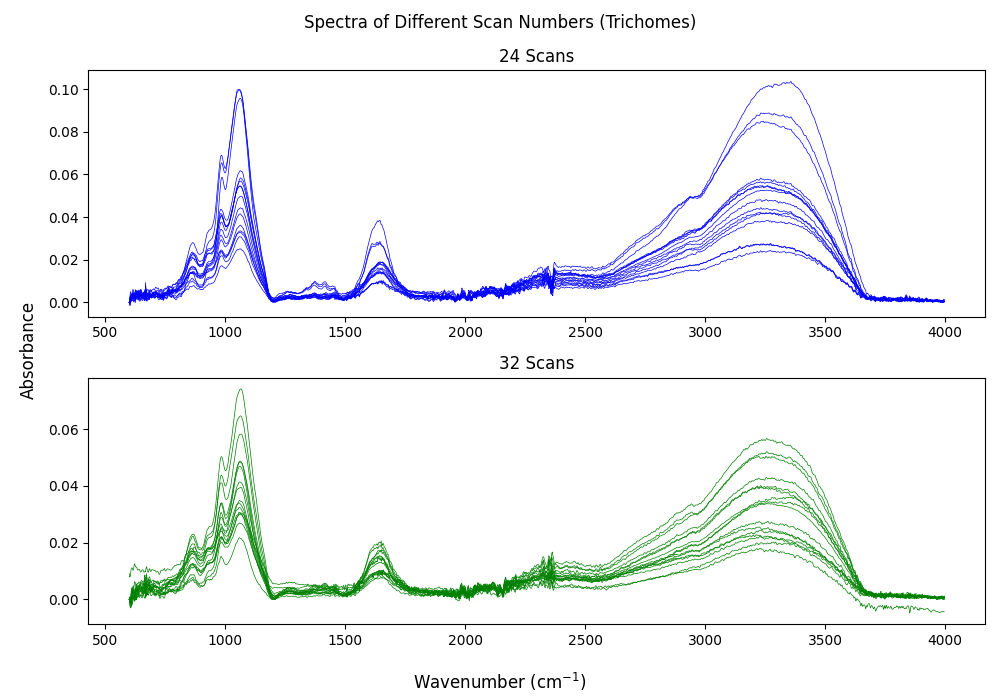

In [6]:
all_scans_fig, asf_axes = plt.subplots(2, 1, figsize=(10, 7))

for axis, name, color, df in zip(
    asf_axes, scan_labels, colors, scan_number_dataframes
):
    for replicate in df.columns:
        spectrum = df[replicate]
        axis.plot(wavenumber, spectrum, color=color, linewidth=0.5)

    axis.set(title=f"{name} Scans")

all_scans_fig.suptitle("Spectra of Different Scan Numbers (Trichomes)")
all_scans_fig.supxlabel("Wavenumber (cm$^{-1}$)")
all_scans_fig.supylabel("Absorbance")

all_scans_fig.tight_layout()

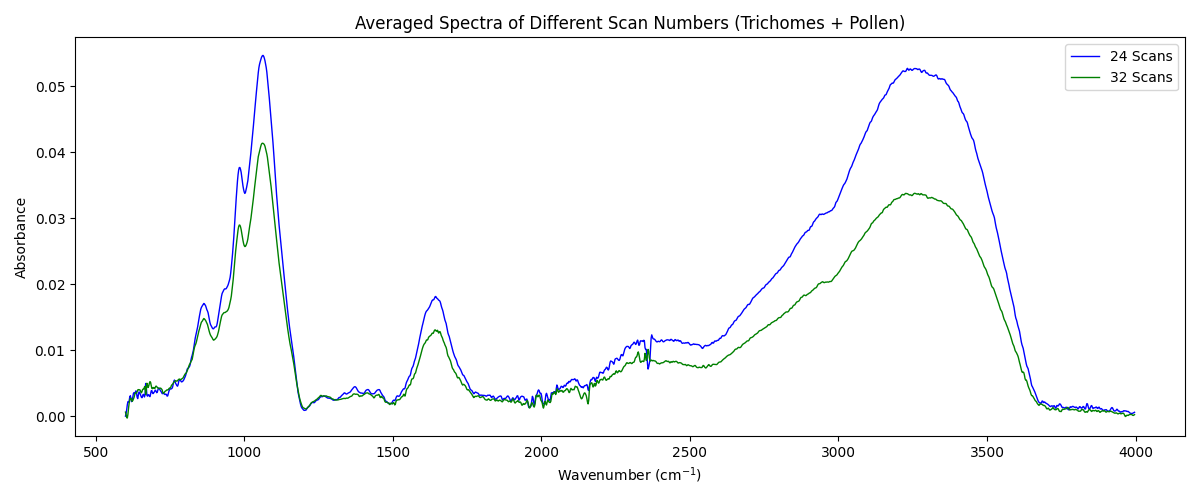

In [7]:
ave_scans_fig, ave_axes = plt.subplots(1, 1, figsize=(12, 5))

for name, color, df in zip(scan_labels, colors, scan_number_dataframes):
    spectrum = df["average"]
    ave_axes.plot(
        wavenumber, spectrum, color=color, linewidth=1, label=f"{name} Scans"
    )

ave_axes.legend()
ave_axes.set(
    title="Averaged Spectra of Different Scan Numbers (Trichomes + Pollen)",
    xlabel="Wavenumber (cm$^{-1}$)",
    ylabel="Absorbance",
)
ave_scans_fig.tight_layout()

<h1 align="center">MDI Computation & Analysis</h1>

In [8]:
mdi_compute("protein_extract_spectra", "mdi_results")
#smdi_compute("mdi_results", "mdi_results")

In [9]:
mdi_results = pd.read_csv("./mdi_results/master_mdi.csv")

In [10]:
mdi_results

,protein_extract_24_scans_mdi,protein_extract_32_scans_mdi
0,-0.013206,-0.012027
1,-0.012393,-0.012007
2,-0.013139,-0.011933
3,-0.012386,-0.012914
4,-0.012140,-0.012896
5,-0.012222,-0.012751
6,-0.012767,-0.013003
7,-0.012478,-0.012751
8,-0.012666,-0.012671
9,-0.013391,-0.012581


<h2 align="center">Visualization</h2>

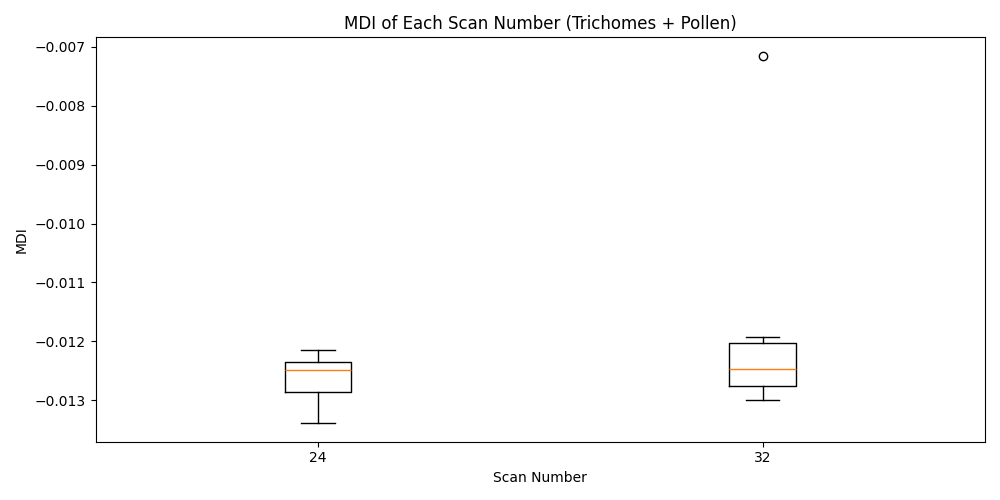

In [11]:
plt.close("all")
mdi_box, box_axis = plt.subplots(1, 1, figsize=(10, 5))

pooled_mdi_data = [mdi_results[column] for column in mdi_results.columns]

box_axis.boxplot(x=pooled_mdi_data)
box_axis.set(
    title="MDI of Each Scan Number (Trichomes + Pollen)",
    xlabel="Scan Number",
    ylabel="MDI",
    xticklabels=['24', '32'],
)

mdi_box.tight_layout()

<h2 align="center">Statistical Analyses</h2>

<h3 align="center">Test for Normality (Shapiro-Wilk Test)</h3>

In [12]:
pg.normality(mdi_results, method="normaltest", alpha=0.05).round(3)

c:\Users\Danilo Pudolin Jr\AppData\Local\Programs\Python\Python313\Lib\site-packages\scipy\stats\_axis_nan_policy.py:430: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=15 observations were given.
  return hypotest_fun_in(*args, **kwds)


,W,pval,normal
protein_extract_24_scans_mdi,1.855,0.396,True
protein_extract_32_scans_mdi,35.753,0.000,False


<h3 align="center">Test for Homogeneity of Variances (Levene's Test)</h3>

In [13]:
pg.homoscedasticity(mdi_results, method="levene").round(3)

,W,pval,equal_var
levene,0.999,0.326,True


<h3 align="center">Group Comparison (Kruskal-Wallis)</h3>

In [14]:
mdi_results_melted = mdi_results.melt(var_name="scan_number", value_name="mdi")

In [15]:
pg.anova(mdi_results_melted, dv="mdi", between="scan_number", detailed=True)

,Source,SS,DF,MS,F,p-unc,np2
0,scan_number,0.000002,1,0.000002,1.819813,0.188145,0.061027
1,Within,0.000030,28,0.000001,NaN,NaN,NaN
